<h1>1단계) 탐색 : movielens데이터 살펴보기</h1>

In [1]:
%matplotlib inline

import time
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


rating_file_path = "data/ratings.dat"
movie_file_path = "data/movies.dat"
user_file_patth = "data/users.dat"

rating_data = pd.io.parsers.read_csv(rating_file_path,
                                     names=['user_id','movie_id','rating','time'], delimiter='::')
movie_data = pd.io.parsers.read_csv(movie_file_path,
                                     names=['movie_id','title','genre'], delimiter='::')
user_data = pd.io.parsers.read_csv(user_file_patth,
                                     names=['user_id','gender','age','occupation','zipcode'], delimiter='::')

print('rating 데이터')
rating_data.head()

rating 데이터


,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [2]:
print('movie 데이터')
movie_data.head()

movie 데이터


,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
user_data.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


<h1>2단계) 분석:탐색적 데이터 분석</h1>

In [4]:
# 총 영화 갯수 출력
print("total number of movie in data :", len(movie_data['movie_id'].unique()))

#연도별 영화 개수가 많은 top 10 년도를 출력
movie_data['year'] = movie_data['title'].apply(lambda x: x[-5:-1])
movie_data['year'].value_counts().head(10)

total number of movie in data : 3883


1996    345
1995    342
1998    337
1997    315
1999    283
1994    257
1993    165
2000    156
1986    104
1992    102
Name: year, dtype: int64

1910       3
1920      34
1930      77
1940     126
1950     168
1960     191
1970     247
1980     598
1990    2283
2000     156
Name: year_term, dtype: int64


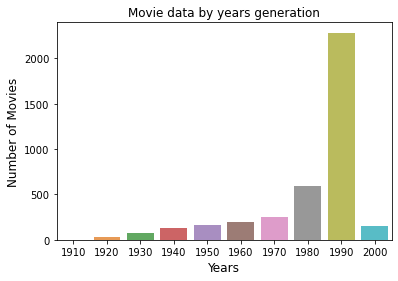

In [5]:
movie_data['year_term'] = movie_data['title'].apply(lambda x: x[-5:-2]+"0")
moview_year_term = movie_data['year_term'].value_counts().sort_index()
print(moview_year_term)

sns.barplot(moview_year_term.index, moview_year_term.values, alpha=0.8)
plt.title("Movie data by years generation")
plt.ylabel("Number of Movies", fontsize=12)
plt.xlabel('Years', fontsize=12)
plt.show()

In [6]:
unique_genre_dict = {}
for index, row in movie_data.iterrows():
    genre_combination = row['genre']
    parsed_genre = genre_combination.split('|')
    
    for genre in parsed_genre:
        if genre in unique_genre_dict:
            unique_genre_dict[genre] += 1
        else:
            unique_genre_dict[genre] = 1
            
print(unique_genre_dict)

{'Animation': 105, "Children's": 251, 'Comedy': 1200, 'Adventure': 283, 'Fantasy': 68, 'Romance': 471, 'Drama': 1603, 'Action': 503, 'Crime': 211, 'Thriller': 492, 'Horror': 343, 'Sci-Fi': 276, 'Documentary': 127, 'War': 143, 'Musical': 114, 'Mystery': 106, 'Film-Noir': 44, 'Western': 68}


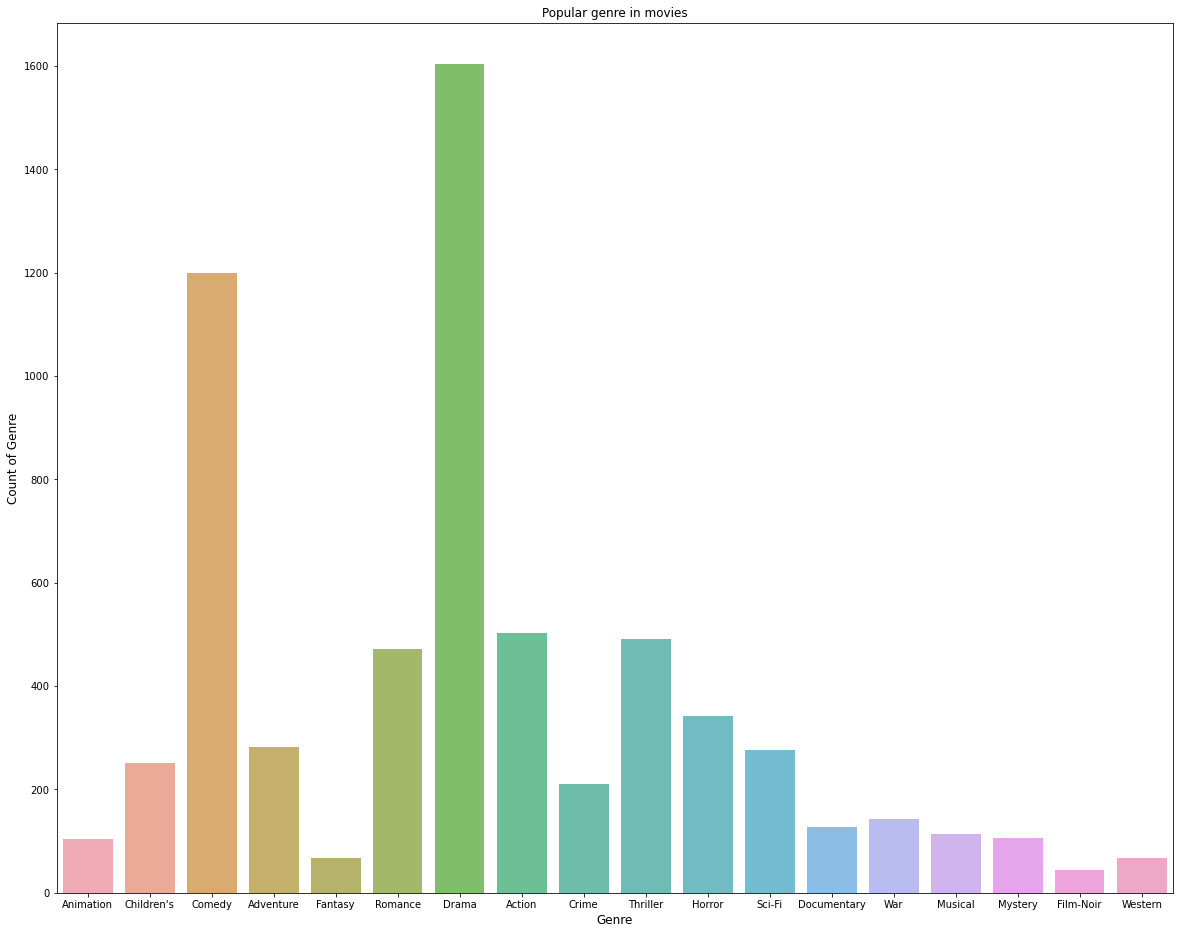

In [7]:
plt.rcParams['figure.figsize'] = [20, 16]
sns.barplot(list(unique_genre_dict.keys()), list(unique_genre_dict.values()), alpha=0.8)
plt.title("Popular genre in movies")
plt.ylabel("Count of Genre", fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.show()

In [8]:
print("total number of user in data :", len(user_data['user_id'].unique()))

total number of user in data : 6040


<h1>연습문제</h1>
유저 데이터에 대한 탐색적 데이터 분석 실행 gogo

유저의 성별 탐색

유저의 연령대 탐색

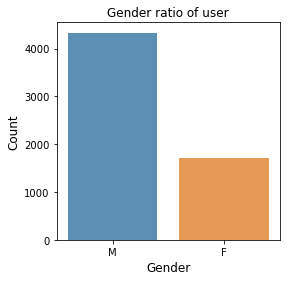

In [9]:
plt.rcParams['figure.figsize'] = [4, 4]
user_gender = user_data['gender'].value_counts()
sns.barplot(user_gender.index, user_gender.values, alpha=0.8)
plt.title("Gender ratio of user")
plt.ylabel("Count", fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

In [10]:
user_data['age'].value_counts()

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: age, dtype: int64

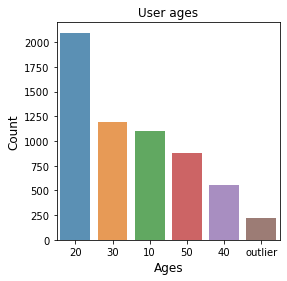

In [11]:
def age_classifcation(age):
    if age == 1:
        return 'outlier'
    else:
        return str(age)[0] + '0'
    
user_data['ages'] = user_data['age'].apply(lambda x: age_classifcation(x))
user_ages = user_data['ages'].value_counts()

sns.barplot(user_ages.index, user_ages.values, alpha=0.8)
plt.title("User ages")
plt.ylabel("Count", fontsize=12)
plt.xlabel('Ages', fontsize=12)
plt.show()

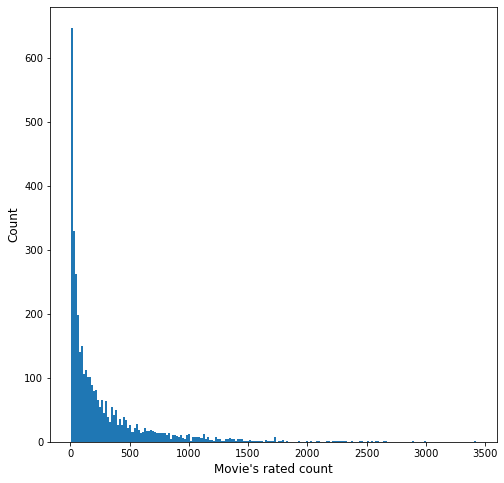

3883
1687


In [12]:
movie_rate_count = rating_data.groupby('movie_id')['rating'].count().values
plt.rcParams['figure.figsize'] = [8,8]
fig = plt.hist(movie_rate_count, bins=200)
plt.ylabel('Count', fontsize=12)
plt.xlabel("Movie's rated count", fontsize=12)
plt.show()
print(len(movie_data['movie_id'].unique()))
print(len(movie_rate_count[movie_rate_count < 100]))

In [13]:
movie_grouped_rating_info = rating_data.groupby('movie_id')['rating'].agg(['count','mean'])
movie_grouped_rating_info.head(5)

,count,mean
movie_id,,
1,2077,4.146846
2,701,3.201141
3,478,3.016736
4,170,2.729412
5,296,3.006757


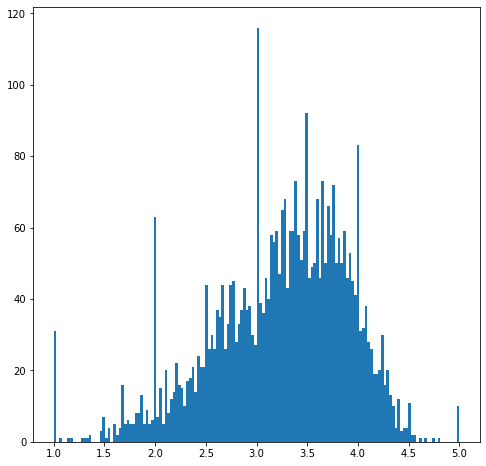

In [14]:
movie_grouped_rating_info['mean'].hist(bins=150, grid=False)


In [15]:
merged_data = movie_grouped_rating_info.merge(movie_data, on=['movie_id'], how='left')
merged_data[merged_data['count'] > 100][['mean','title']].nlargest(10,'mean')

,mean,title
1839,4.560510,Seven Samurai (The Magnificent Seven) (Shichin...
309,4.554558,"Shawshank Redemption, The (1994)"
802,4.524966,"Godfather, The (1972)"
708,4.520548,"Close Shave, A (1995)"
49,4.517106,"Usual Suspects, The (1995)"
513,4.510417,Schindler's List (1993)
1066,4.507937,"Wrong Trousers, The (1993)"
861,4.491489,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
1108,4.477725,Raiders of the Lost Ark (1981)
843,4.476190,Rear Window (1954)


<h1>연습문제</h1>

유저별로 평가한 영화 갯수

유저별로 평가한 평균 영화 점수

유저별로 평가한 영화 점수의 편차

In [16]:
#유저별 영화 평가를 탐색
user_grouped_rating_info = rating_data.groupby('user_id')['rating'].agg({'count','mean','std'})
user_grouped_rating_info.head()

,mean,std,count
user_id,,,
1,4.188679,0.680967,53
2,3.713178,1.001513,129
3,3.901961,0.984985,51
4,4.190476,1.077917,21
5,3.146465,1.132699,198


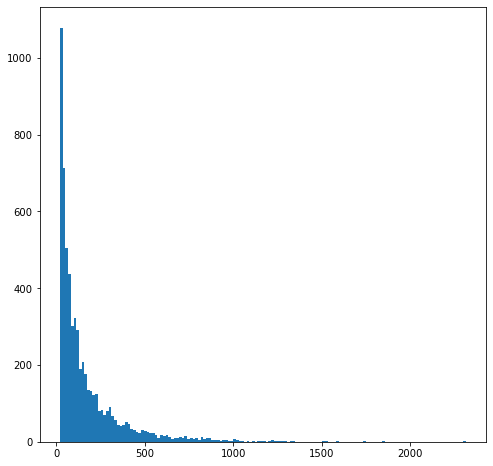

In [17]:
# 유저별로 평가한 영화 개수의 분포를 그래프 출력
user_grouped_rating_info['count'].hist(bins=150, grid=False)

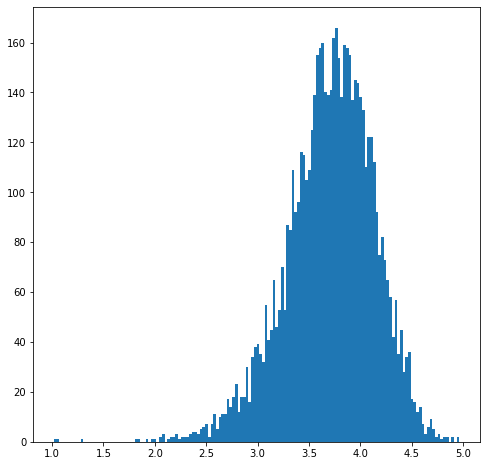

In [18]:
#유저별로 평가한 영화 점수 평균의 분포 그래프
user_grouped_rating_info['mean'].hist(bins=150, grid=False)

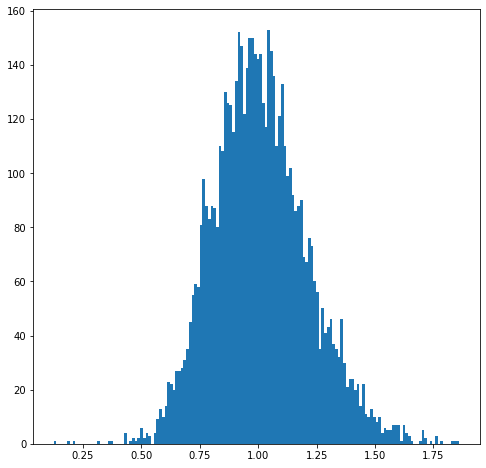

In [19]:
#유저별로 평가한 영화 점수 편차의 분포 그래프
user_grouped_rating_info['std'].hist(bins=150, grid=False)

In [20]:
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [21]:
rating_table = rating_data[['user_id','movie_id','rating']].set_index(['user_id','movie_id']).unstack()
rating_table.head(10)

rating                                               ...            \
movie_id   1    2    3    4    5    6    7    8    9    10    ... 3943 3944   
user_id                                                       ...             
1           5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
3           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
4           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
5           NaN  NaN  NaN  NaN  NaN  2.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6           4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
7           NaN  NaN  NaN  NaN  NaN  4.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
8           4.0  NaN  NaN  3.0  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
9           5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
10          5.0  5.0  NaN  NaN  NaN  NaN  4.0  NaN  NaN  NaN  ...  NaN  NaN   

                                                  
movie_id 3945 3946 3947 3948 3949 3950 3951 3952  
user_id                                           
1         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
8         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9         NaN  NaN  NaN  3.0  NaN  NaN  NaN  NaN  
10        NaN  NaN  NaN  4.0  NaN  NaN  NaN  NaN  

[10 rows x 3706 columns]

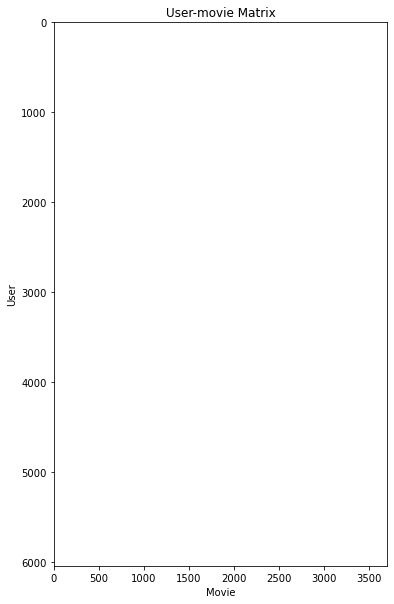

In [22]:
plt.rcParams['figure.figsize'] = [10,10]
plt.imshow(rating_table)
plt.grid(False)
plt.xlabel("Movie")
plt.ylabel("User")
plt.title("User-movie Matrix")
plt.show()

In [23]:
#빈칸을 포함한 user-item 행렬 생성

from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

np.set_printoptions(suppress=True)
reader = Reader(rating_scale=(1,5))

#데이터 프레임 생성
ratings_dict = {'item_id':[1,2,3,1,2,3,2],
               'user_id':['a','a','a','b','b','b','c'],
               'rating':[2,4,4,2,5,4,5]}
df = pd.DataFrame(ratings_dict)
df.head(10)

,item_id,user_id,rating
0,1,a,2
1,2,a,4
2,3,a,4
3,1,b,2
4,2,b,5
5,3,b,4
6,2,c,5


In [24]:
#데이터 프레임을 행렬로 반환하여 확인
df_matrix_table = df[['user_id','item_id','rating']].set_index(["user_id","item_id"]).unstack().fillna(0)

df_matrix_table.head(10)

rating          
item_id      1    2    3
user_id                 
a          2.0  4.0  4.0
b          2.0  5.0  4.0
c          0.0  5.0  0.0

In [25]:
#SVD 사용을 위한 데이터 셋을 생성
data = Dataset.load_from_df(df=df[['user_id','item_id','rating']], reader=reader)
train_data = data.build_full_trainset()

#SVD 모델을 학습한다.
model = SVD(n_factors=8,
           lr_all=0.005,
           reg_all=0.02,
           n_epochs=10)
model.fit(train_data)

#학습 모델을 기반으로 빈공간 점수를 예측한다.

test_data = train_data.build_anti_testset()
predictions = model.test(test_data)


'''
build_anti_testset():
학습에 사용된 matrix 에서 0에서 평가되어 있는 rating이 0인지점 부분의 데이터
user 혹은 item 은 학습에서 반드시 등장을 해야한다는 저넺조건을 통해 추출
'''
#test_data : 학습에 사용된 유저, 혹은 아이템이지만 점수는 매겨지지않은 데이터이다.

#아래 결과는 빈공간 점수를 예측한 결과
for _, iid, _, predicted_rating, _ in predictions:
    print("item id", iid, "|", "predicted rating :", predicted_rating)

item id 1 | predicted rating : 3.61471231391016
item id 3 | predicted rating : 3.8431288734546993


In [26]:
test_data = train_data.build_testset()
predictions = model.test(test_data)

for _, iid, _, predicted_rating, _ in predictions:
    print("item id", iid, "|", "predicted rating :", predicted_rating)

item id 1 | predicted rating : 3.4871886747197522
item id 2 | predicted rating : 3.7871596865563237
item id 3 | predicted rating : 3.6880493799362886
item id 1 | predicted rating : 3.5493686098996595
item id 2 | predicted rating : 3.8540138631888583
item id 3 | predicted rating : 3.730213096036038
item id 2 | predicted rating : 3.8759108359299304


In [28]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(rating_data[['user_id','movie_id','rating']], reader)
train_data = data.build_full_trainset()

train_start = time.time()
model = SVD(n_factors=8,
           lr_all=0.005,
           reg_all=0.02,
           n_epochs=100)
model.fit(train_data)

train_end = time.time()
print('training time of model: %.2f seconds'%(train_end - train_start))

training time of model: 89.31 seconds


In [29]:
target_user_id = 4
target_user_data = rating_data[rating_data['user_id'] == target_user_id]
target_user_data.head(5)

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282


In [30]:
target_user_movie_rating_dict = {}

for index, row in target_user_data.iterrows():
    movie_id = row['movie_id']
    target_user_movie_rating_dict[movie_id] = row['rating']
print(target_user_movie_rating_dict)

{3468: 5, 1210: 3, 2951: 4, 1214: 4, 1036: 4, 260: 5, 2028: 5, 480: 4, 1196: 2, 1198: 5, 1954: 5, 1097: 4, 3418: 4, 3702: 4, 2366: 4, 1387: 5, 3527: 1, 1201: 5, 2692: 5, 2947: 5, 1240: 5}


In [31]:
test_data = []
for index, row in target_user_data.iterrows():
    movie_id = row['movie_id']
    rating = 0
    if movie_id in target_user_movie_rating_dict:
        continue
    test_data.append((target_user_id, movie_id, rating))

    
target_user_predictions = model.test(test_data)

def get_user_predicted_ratings(predictions, user_id, user_history):
    target_user_movie_predict_dict = {}
    for uid, mid, rating, predicted_rating, _ in predictions:
        if user_id == uid:
            if mid not in user_history:
                target_user_movie_predict_dict[mid] = predicted_rating
    return target_user_movie_predict_dict

target_user_movie_predict_dict = get_user_predicted_ratings(predictions=target_user_predictions, user_id=target_user_id,
                                                            user_history = target_user_movie_rating_dict)

target_user_top10_predicted = sorted(target_user_movie_predict_dict.items(),
                                    key=operator.itemgetter(1),reverse=True)[:10]


target_user_top10_predicted

[]